In [1]:
# Instalação do modelo de linguagem português para spaCy
!python3 -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 📝 Processamento de Linguagem Natural com Python

## 🎯 Objetivo do Estudo
Este notebook demonstra técnicas fundamentais de PLN aplicadas a textos médicos em português, com foco em:
- **Busca de palavras-chave** em corpus especializado
- **Geração de nuvem de palavras** para visualização de termos frequentes
- **Análise de entidades nomeadas** no domínio médico

## 📚 Importação das bibliotecas

In [2]:
# Bibliotecas essenciais para processamento de texto e web scraping
import bs4 as bs              # Beautiful Soup para parsing HTML
import urllib.request         # Requisições HTTP
import nltk                   # Natural Language Toolkit
import spacy                  # Pipeline de PLN para português

## 🏷️ Configuração do Pipeline spaCy

**POS Tagging (Part-of-Speech)**
- Atribui categorias gramaticais às palavras (substantivos, adjetivos, verbos)
- Fundamental para detecção de entidades e análise sintática
- Referências:
  - [Anotações spaCy](https://spacy.io/api/annotation#pos-tagging)
  - [Tagset português](https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/)

In [3]:
# Carrega o modelo de linguagem português atualizado (dezembro 2024)
# Substitui o modelo legado 'pt' pelo 'pt_core_news_sm'
pln = spacy.load('pt_core_news_sm')
pln

In [4]:
import urllib.request

# Configura requisição HTTP com User-Agent para simular navegador
req = urllib.request.Request(
    'https://pt.wikipedia.org/wiki/Enfarte_agudo_do_mioc%C3%A1rdio',
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
)

# Executa a requisição e obtém o conteúdo HTML
dados = urllib.request.urlopen(req)

## 🌐 Coleta de dados: Web Scraping

Extraímos conteúdo da Wikipedia sobre "Enfarte agudo do miocárdio" para criar um corpus médico em português. O User-Agent simula uma requisição de navegador para evitar bloqueios.

In [5]:
# Parseia o HTML usando Beautiful Soup com parser lxml
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Enfarte agudo do miocárdio – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limite

In [6]:
# Extrai todos os parágrafos da página Wikipedia
paragrafos = dados_html.find_all('p')

In [7]:
# Verifica quantos parágrafos foram extraídos
len(paragrafos)

55

In [8]:
# Consolida todo o texto dos parágrafos em uma única string
conteudo = ''
for p in paragrafos:
    conteudo += p.text

# Exibe o corpus completo para inspeção
conteudo

'Um enfarte agudo do miocárdio (português europeu) ou infarto agudo do miocárdio (português brasileiro), vulgarmente denominado ataque cardíaco, ocorre quando a circulação de sangue para uma  parte do coração é interrompida, causando lesões no músculo cardíaco. O sintoma mais comum em homens é dor no peito ou desconforto que se pode espalhar para o ombro, costas, pescoço ou maxilar. É comum ter início no lado esquerdo do peito e durar alguns minutos. O desconforto pode por vezes ser semelhante à azia. Entre outros sintomas possíveis estão a falta de ar, náuseas, sensação de desmaio, suores frios ou fadiga.[1] Cerca de 30% das pessoas manifestam sintomas atípicos,[7] os quais são mais comuns entre mulheres.[10] Entre as pessoas com mais de 75 anos de idade, cerca de 5% tiveram um enfarte do miocárdio com poucos ou nenhuns sintomas.[11] Um enfarte do miocárdio pode causar insuficiência cardíaca, arritmia cardíaca ou paragem cardiorrespiratória.[2][3]\nA maior parte dos enfartes do miocár

## 🧠 Preparação do Pipeline PLN

Configuramos o modelo spaCy para processar o texto coletado, preparando-o para as análises subsequentes de busca e visualização.

In [9]:
# Recarrega o pipeline para garantir consistência
pln = spacy.load('pt_core_news_sm')
pln

## 🔍 Análise de busca de palavras

Nesta etapa isolamos o fluxo dedicado a localizar termos específicos no corpus coletado. Documentamos as configurações utilizadas e guardamos as variáveis que serão reutilizadas na visualização dos trechos encontrados.

In [10]:
# Define o termo que desejamos localizar no texto completo
termo_busca = "cardíaco"
token_pesquisa = pln(termo_busca)

In [11]:
# Inspeção opcional do vocabulário carregado pelo pipeline
pln.vocab

In [12]:
from spacy.matcher import PhraseMatcher

# Cria um matcher baseado em frases para localizar o termo exato no documento
matcher = PhraseMatcher(pln.vocab)
matcher.add("SEARCH", [token_pesquisa])

In [13]:
# Processa o texto completo e encontra todas as correspondências do termo
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 22, 23),
 (8661325627334373315, 43, 44),
 (8661325627334373315, 746, 747),
 (8661325627334373315, 962, 963),
 (8661325627334373315, 1279, 1280),
 (8661325627334373315, 2165, 2166),
 (8661325627334373315, 2275, 2276)]

In [14]:
from IPython.display import HTML

# Controla o tamanho da janela de contexto a ser exibida ao redor do termo
janela_tokens = 150

# Consolida os resultados em HTML para visualização no notebook
highlighted_snippets = []

display(HTML(f"<h1>{termo_busca.upper()}</h1>"))
display(HTML(f"<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"))

for match_id, start, end in matches:
    inicio = max(start - janela_tokens, 0)
    fim = end + janela_tokens
    trecho = doc[inicio:fim].text.replace(termo_busca, f"<mark>{termo_busca}</mark>")
    highlighted_snippets.append(trecho)

display(HTML("<br /><br />".join(highlighted_snippets)))

## ☁️ Visualização da nuvem de palavras

Esta seção concentra o pré-processamento necessário para gerar a nuvem de palavras, evidenciando os termos mais frequentes após a remoção das stopwords em português.

In [15]:
# Lista entidades nomeadas identificadas no texto processado
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

ST.[7 MISC
CK LOC
CK-MB MISC
guidelines.[6][14 ORG
miocárdio.[8 ORG
ST MISC
ST MISC
ST LOC
ST MISC
Entre 1990 MISC
IAM ORG
Pacientes diabéticos MISC
IAM ORG
Insuficiência PER
IAM ORG
Organização Mundial de Saúde ORG
IAM ORG
IAM ORG
IAM ORG
IAM ORG
IAM ORG
CK-MB MISC
CK-MB MISC
Doppler PER
Ecocardiograma LOC
IAM ORG
Angioplastia PER
Cirurgia LOC
FRP ORG
ECG ORG
IAM ORG
O2 MISC
ECG PER
ECG ORG
ST MISC
IAM ORG
Centros de Terapia Intensiva LOC
ECG ORG
ST MISC
Alternativa PER
Aspirina LOC
ADP MISC
IIb-IIIa PER
IAM ORG
trombina IIa MISC
Xá MISC
Nitratos MISC
Betabloqueadores LOC
Enzima LOC
Angiotensina LOC
iECA MISC
AVC ORG
iECA MISC
IAM ORG
AVC MISC
AVC MISC
intracraniana LOC
IAM ORG
ST LOC
Unidades de Terapia Intensiva LOC
Unidades MISC
Fibrilação ventricular MISC
Estados Unidos LOC
Cardiomiopatia: Dilatada MISC
Hipertrófica MISC
Restritiva PER
Endocardite de Loeffler PER
Amiloidose PER
Fibroelastose PER


In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS

# Conjunto de stopwords nativas da língua portuguesa no spaCy
print(STOP_WORDS)

{'coisa', 'maior', 'sexta', 'ademais', 'nunca', 'tivestes', 'ir', 'somente', 'terceira', 'tivemos', 'dá', 'obrigada', 'algumas', 'se', 'cada', 'vos', 'embora', 'tentei', 'aqui', 'naquela', 'além', 'novo', 'daquela', 'com', 'me', 'tuas', 'sim', 'longe', 'lhe', 'através', 'agora', 'doze', 'esses', 'fazia', 'mil', 'tanta', 'vindo', 'teus', 'porém', 'suas', 'naquele', 'onze', 'quê', 'vezes', 'isto', 'tem', 'tão', 'debaixo', 'possível', 'de', 'e', 'grande', 'comprida', 'deve', 'ver', 'apoio', 'qual', 'fora', 'nossa', 'sem', 'tens', 'nossas', 'meus', 'podem', 'ele', 'os', 'aquele', 'ou', 'dessa', 'pelo', 'usa', 'iniciar', 'estão', 'nível', 'saber', 'vosso', 'depois', 'vossa', 'porquê', 'nesse', 'apenas', 'estará', 'direita', 'cima', 'outros', 'neste', 'três', 'dezasseis', 'vai', 'meu', 'desse', 'lado', 'fez', 'ambos', 'sobre', 'grupo', 'último', 'primeiro', 'mal', 'numa', 'tenho', 'diz', 'vais', 'faço', 'esta', 'fazer', 'quinta', 'dizem', 'o', 'acerca', 'assim', 'cujo', 'dizer', 'cedo', 'mui

In [17]:
# Verifica se uma palavra específica ("usa") está marcada como stopword
pln.vocab["usa"].is_stop

True

In [18]:
# Converte o documento em uma lista de tokens (strings)
tokens = [token.text for token in doc]

In [19]:
# Inspeção rápida do conteúdo tokenizado
print(tokens)

['Um', 'enfarte', 'agudo', 'do', 'miocárdio', '(', 'português', 'europeu', ')', 'ou', 'infarto', 'agudo', 'do', 'miocárdio', '(', 'português', 'brasileiro', ')', ',', 'vulgarmente', 'denominado', 'ataque', 'cardíaco', ',', 'ocorre', 'quando', 'a', 'circulação', 'de', 'sangue', 'para', 'uma', ' ', 'parte', 'do', 'coração', 'é', 'interrompida', ',', 'causando', 'lesões', 'no', 'músculo', 'cardíaco', '.', 'O', 'sintoma', 'mais', 'comum', 'em', 'homens', 'é', 'dor', 'no', 'peito', 'ou', 'desconforto', 'que', 'se', 'pode', 'espalhar', 'para', 'o', 'ombro', ',', 'costas', ',', 'pescoço', 'ou', 'maxilar', '.', 'É', 'comum', 'ter', 'início', 'no', 'lado', 'esquerdo', 'do', 'peito', 'e', 'durar', 'alguns', 'minutos', '.', 'O', 'desconforto', 'pode', 'por', 'vezes', 'ser', 'semelhante', 'à', 'azia', '.', 'Entre', 'outros', 'sintomas', 'possíveis', 'estão', 'a', 'falta', 'de', 'ar', ',', 'náuseas', ',', 'sensação', 'de', 'desmaio', ',', 'suores', 'frios', 'ou', 'fadiga.[1', ']', 'Cerca', 'de', '3

In [20]:
# Remove stopwords para destacar apenas termos relevantes
tokens_sem_stop = [token for token in tokens if not pln.vocab[token].is_stop]

In [21]:
# Quantidade de tokens após a remoção de stopwords
len(tokens_sem_stop)

2149

In [22]:
from matplotlib.colors import ListedColormap

# Define uma paleta personalizada para a nuvem de palavras
color_map = ListedColormap(['orange', 'purple', 'red', 'blue'])

In [23]:
from wordcloud import WordCloud

# Inicializa o objeto WordCloud com configurações visuais
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

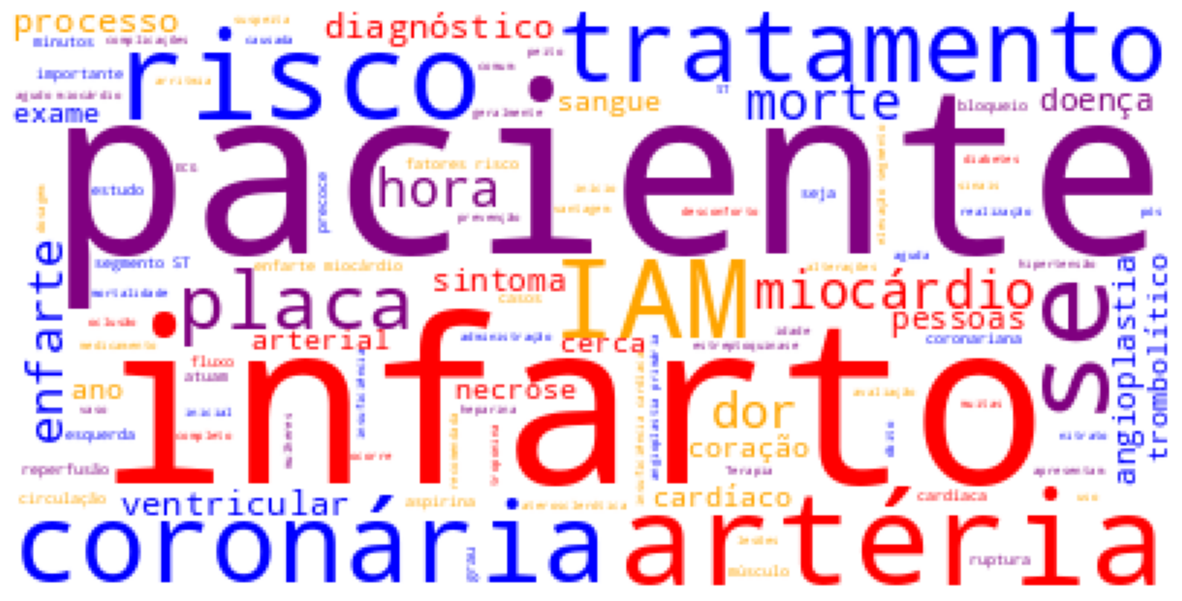

In [24]:
import matplotlib.pyplot as plt

# Gera e exibe a nuvem de palavras com os tokens filtrados
cloud = cloud.generate(' '.join(tokens_sem_stop))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()